## Permutations and Combinations

`set = {a, b, c}` 

- **Permutations** are the number of orders the elements can have. 
    - For the set above, `abc`, `acb`, `bca`, `bac`, `cba`, `cab` exists 
    - 3! 3 Factirial permutations exist
- **Combinations** are a selection of elements from a set
    - `math.comb(n, k)` calculates the number of ways to choose **k** elements from a set of **n** elements where the order of the chosen elements does not matter and no element is selected more than once.
    - For the set above, the combinations `{a, b}, {a, c}, {b, c}` exist
    - The formula for combinations is 

$$
\frac{n!}{k!\times(n-k)!}
$$

## Lady Tasting Tea

> <img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Youngronaldfisher2.JPG" alt="Alt text" style="height:300px;float:right;">
> A lady declares that by tasting a cup of tea made with milk she can discriminate whether the milk or the tea infusion was first added to the cup. We will consider the problem of designing an experiment by means of which this assertion can be tested. For this purpose let us first lay down a simple form of experiment with a view to studying its limitations and its characteristics, both those which appear to be essential to the experimental method, when well developed, and those which are not essential but auxiliary.<br><br>
> Our experiment consists in mixing eight cups of tea, four in one way and four in the other, and presenting them to the subject for judgment in a random order. The subject has been told in advance of what the test will consist, namely that she will be asked to taste eight cups, that these shall be four of each kind, and that they shall be presented to her in a random order, that is in an order not determined arbitrarily by human choice, but by the actual manipulation of the physical apparatus used in games of chance cards, dice, roulettes, etc., or, more expeditiously, from a published collection of random sampling numbers purporting to give the actual results of such manipulation. Her task is to divide the 8 cups into two sets of 4, agreeing, if possible, with the treatments received.<br><br>
> <i>The Design of Experiments By Ronald A. Fisher</i>

In [10]:
#Import Libraries
import math
import numpy as np
import random
import matplotlib.pyplot as plt 
import itertools

In [3]:
cups = 8
milk_first = 4

math.comb(cups, milk_first)

70

#### Combinations using `math.comb`

Return the number of ways to choose 4 cups from 8, without being able to choose the same cup twice, order does not matter.
- 70 ways to choose 4 cups from 8, so a 1 in 70 chance she'll randomly choose 4 correct? 

In [ ]:
# Total number of ways to select 4 cups from 8, order does matter:
8*7*6*5 

1680

Cups: `1 2 3 4 5 6 7 8`

Placeholders: `_ _ _ _`

- In this scenario, cups `2`, `4`, `5`, `8`,  is not the same as cups `8`, `4`, `5`, `2`, is not the same as `2`, `5`, `8`, `4` and so on... 
- This scenario ends up being `8*7*6*5`  because when I put a cup in place 1, I have 7 options for place 2. When I put a cup in place 2, I have 6 options for place 3, when I put a cup in place 3, I have  5 options for place 4. 
- But we do not care about the order, so we would take the results of `8*7*6*5` and divide that by the amount of orders the 4 cups can have, which is `4*3*2*1`.
- `8*7*6*5` is actually $8! \div (8-4)!$
- `4*3*2*1` is $4!$
- So, this becomes: 

$$
\frac{n!}{k!\times(n-k)!}
$$



In [6]:
# No of ways of shuffling 4 cups:
4*3*2*1

24

In [8]:
1680//24

70

## Lady Tasting Tea Experiment

In [17]:
# The labels on the cups:
labels = list(range(8))
# The 70 combinations of 4 that exist
combs = list(itertools.combinations(labels, 4))
# The actual combination that contain the milk first 
milk_cups = random.sample(labels, 4)
milk_cups

[7, 6, 1, 0]

In [20]:
#Print the intersection between the list of 70 combinations 
# and the actual set with milk first 
milk_cups_set = set(milk_cups)
number_overlaps = []

for comb in combs:
    # for each combination in the list - first make it into a set so that the .intersections() function works
    comb_set = set(comb)
    overlap = comb_set.intersection(milk_cups_set)
    number_overlaps.append(len(overlap))
    print(comb_set, len(overlap), overlap)

{0, 1, 2, 3} 2 {0, 1}
{0, 1, 2, 4} 2 {0, 1}
{0, 1, 2, 5} 2 {0, 1}
{0, 1, 2, 6} 3 {0, 1, 6}
{0, 1, 2, 7} 3 {0, 1, 7}
{0, 1, 3, 4} 2 {0, 1}
{0, 1, 3, 5} 2 {0, 1}
{0, 1, 3, 6} 3 {0, 1, 6}
{0, 1, 3, 7} 3 {0, 1, 7}
{0, 1, 4, 5} 2 {0, 1}
{0, 1, 4, 6} 3 {0, 1, 6}
{0, 1, 4, 7} 3 {0, 1, 7}
{0, 1, 5, 6} 3 {0, 1, 6}
{0, 1, 5, 7} 3 {0, 1, 7}
{0, 1, 6, 7} 4 {0, 1, 6, 7}
{0, 2, 3, 4} 1 {0}
{0, 2, 3, 5} 1 {0}
{0, 2, 3, 6} 2 {0, 6}
{0, 2, 3, 7} 2 {0, 7}
{0, 2, 4, 5} 1 {0}
{0, 2, 4, 6} 2 {0, 6}
{0, 2, 4, 7} 2 {0, 7}
{0, 2, 5, 6} 2 {0, 6}
{0, 2, 5, 7} 2 {0, 7}
{0, 2, 6, 7} 3 {0, 6, 7}
{0, 3, 4, 5} 1 {0}
{0, 3, 4, 6} 2 {0, 6}
{0, 3, 4, 7} 2 {0, 7}
{0, 3, 5, 6} 2 {0, 6}
{0, 3, 5, 7} 2 {0, 7}
{0, 3, 6, 7} 3 {0, 6, 7}
{0, 4, 5, 6} 2 {0, 6}
{0, 4, 5, 7} 2 {0, 7}
{0, 4, 6, 7} 3 {0, 6, 7}
{0, 5, 6, 7} 3 {0, 6, 7}
{1, 2, 3, 4} 1 {1}
{1, 2, 3, 5} 1 {1}
{1, 2, 3, 6} 2 {1, 6}
{1, 2, 3, 7} 2 {1, 7}
{1, 2, 4, 5} 1 {1}
{1, 2, 4, 6} 2 {1, 6}
{1, 2, 4, 7} 2 {1, 7}
{1, 2, 5, 6} 2 {1, 6}
{1, 2, 5, 7} 2 {1, 7}
{1, 2, 6, 7

In [24]:
# Now find out in how many of the 70 combinations do the 4 milk cups overlap (obviously only once)
# In how many of the 70 combinations do the 4 milk cups not show up (also obviously only once)
# How many overlap 1 cup, 2 cups, 3 cups though?

counts = np.unique(number_overlaps, return_counts=True)
counts

(array([0, 1, 2, 3, 4]), array([ 1, 16, 36, 16,  1]))

<BarContainer object of 5 artists>

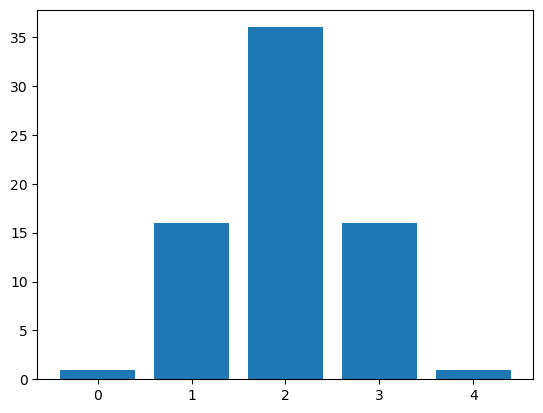

In [25]:
plt.bar(counts[0], counts[1])

In [27]:
#From the above overlaps in the list of 70 possible combinations
p_zero_cups = 1/70
p_one_cup = 16/70
p_two_cups = 36/70 #A little over half that she will pick two correct cups - why? 
p_three_cups = 16/70
p_all_cups = 1/70

p_at_least_three_cups = (1+16)/70
p__at_least_two_cups = (36+16+1)/70
p_at_least_one_cup = (16+36+16+1)/70

# Hypothesis Testing 

### $H0$ Null Hypothesis: 
- She cannot tell the difference - she is choosing the cups at random 

### $Ha$ Alternative Hypothesis
- She is choosing the cups not at random

## Normal Distribution
****************

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
#Using np.random.binomial() to simulate flipping 2 coins 1000 times
twoflips = np.random.binomial(2, 0.5, 1000)
#Results
# Count the number of times each value occurs.
uniques, counts = np.unique(twoflips, return_counts=True)
uniques, counts


(array([0, 1, 2], dtype=int32), array([274, 488, 238]))

Text(0, 0.5, 'Count')

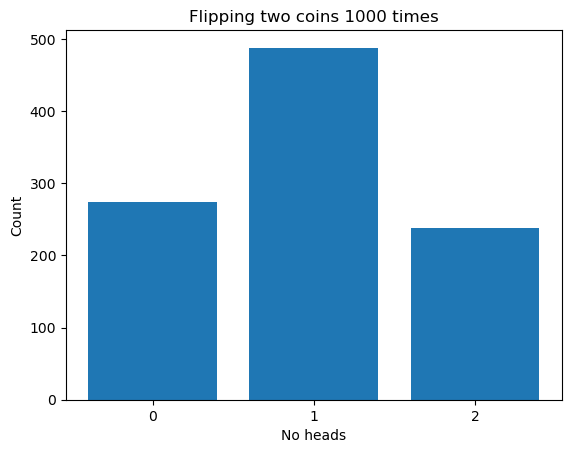

In [4]:
# Create a blank plot.
fig, ax = plt.subplots()
ax.bar(uniques, counts)
ax.set_xticks(uniques)
ax.set_title('Flipping two coins 1000 times')
ax.set_xlabel('No heads')
ax.set_ylabel('Count')